# Tutorial for `Geocroissant` 🥐

## Introduction

<img src="../assets/GeoCroissant.jpg" alt="GeoCroissant" width="150" style="float: right; margin-left: 50px;">

Croissant 🥐 is a high-level format for machine learning datasets that combines metadata, resource file descriptions, data structure, and default ML semantics into a single file.

Croissant builds on schema.org, and its `sc:Dataset` vocabulary, a widely used format to represent datasets on the Web, and make them searchable.

GeoCroissant extends Croissant with geospatial concepts (e.g., spatial extents, coordinate reference systems, temporal coverage), enabling rich, location-aware metadata for Earth-observation and other spatial datasets.

The [`mlcroissant`](https://github.com/mlcommons/croissant) Python library empowers developers to interact with Croissant:

- Programmatically write your JSON-LD Croissant files.
- Verify your JSON-LD Croissant files.
- Load data from Croissant datasets.

In [1]:
# Install mlcroissant
!pip install mlcroissant

# Example: Creating Croissant Metadata for the HLS Burn Scars Dataset

Let's try a concrete example with the [HLS Burn Scars dataset](https://huggingface.co/datasets/ibm-nasa-geospatial/hls_burn_scars) using local files. 

In this tutorial, we'll **programmatically generate** the Croissant JSON-LD metadata for the dataset using the `mlcroissant` Python package, and then **load the dataset locally** for machine learning workflows. 

Finally, we’ll **validate and inspect the metadata structure**.


In [2]:
import json
import os
import glob


def create_hls_burn_scars_config():
    """Create HLS Burn Scars JSON configuration"""

    # Get the actual dataset path
    dataset_path = (
        "/teamspace/studios/this_studio/ZOO-AI-DATASET-MAAS/Introduction to"
        " Geocroissant/hls_burn_scars"
    )

    # Get all file paths for comprehensive listing
    def get_file_paths(split, pattern):
        """Get all file paths for a given split and pattern"""
        search_path = os.path.join(dataset_path, split, pattern)
        files = glob.glob(search_path)
        # Convert to relative paths from dataset root
        relative_files = [os.path.relpath(f, dataset_path) for f in files]
        return sorted(relative_files)

    # Get all training and validation files
    train_images = get_file_paths("training", "*_merged.tif")
    train_annotations = get_file_paths("training", "*.mask.tif")
    val_images = get_file_paths("validation", "*_merged.tif")
    val_annotations = get_file_paths("validation", "*.mask.tif")

    config = {
        "@context": {
            "@language": "en",
            "@vocab": "https://schema.org/",
            "citeAs": "cr:citeAs",
            "column": "cr:column",
            "conformsTo": "dct:conformsTo",
            "cr": "http://mlcommons.org/croissant/",
            "geocr": "http://mlcommons.org/croissant/geocr/",
            "rai": "http://mlcommons.org/croissant/RAI/",
            "dct": "http://purl.org/dc/terms/",
            "sc": "https://schema.org/",
            "data": {"@id": "cr:data", "@type": "@json"},
            "examples": {"@id": "cr:examples", "@type": "@json"},
            "dataBiases": "cr:dataBiases",
            "dataCollection": "cr:dataCollection",
            "dataType": {"@id": "cr:dataType", "@type": "@vocab"},
            "extract": "cr:extract",
            "field": "cr:field",
            "fileProperty": "cr:fileProperty",
            "fileObject": "cr:fileObject",
            "fileSet": "cr:fileSet",
            "format": "cr:format",
            "includes": "cr:includes",
            "isLiveDataset": "cr:isLiveDataset",
            "jsonPath": "cr:jsonPath",
            "key": "cr:key",
            "md5": "cr:md5",
            "parentField": "cr:parentField",
            "path": "cr:path",
            "personalSensitiveInformation": "cr:personalSensitiveInformation",
            "recordSet": "cr:recordSet",
            "references": "cr:references",
            "regex": "cr:regex",
            "repeated": "cr:repeated",
            "replace": "cr:replace",
            "samplingRate": "cr:samplingRate",
            "separator": "cr:separator",
            "source": "cr:source",
            "subField": "cr:subField",
            "transform": "cr:transform",
        },
        "@type": "sc:Dataset",
        "name": "HLS_Burn_Scars",
        "alternateName": ["ibm-nasa-geospatial/hls_burn_scars", "HLS-Burn-Scars-2021"],
        "description": (
            "This dataset contains Harmonized Landsat and Sentinel-2 imagery of burn"
            " scars and the associated masks for the years 2018-2021 over the"
            " contiguous United States. There are 804 512x512 scenes. Its primary"
            " purpose is for training geospatial machine learning models. Each TIFF"
            " file contains a 512x512 pixel scene with six bands (Blue, Green, Red,"
            " NIR, SW1, SW2) converted to reflectance, and masks have one band with"
            " values: 1=Burn scar, 0=Not burned, -1=Missing data."
        ),
        "conformsTo": "http://mlcommons.org/croissant/1.0",
        "version": "1.0.0",
        "creator": {
            "@type": "Organization",
            "name": "IBM-NASA Prithvi Models Family",
            "url": "https://huggingface.co/ibm-nasa-geospatial",
        },
        "url": "https://huggingface.co/datasets/ibm-nasa-geospatial/hls_burn_scars",
        "keywords": [
            "burn scar detection",
            "remote sensing",
            "semantic segmentation",
            "Landsat",
            "Sentinel-2",
            "HLS",
            "wildfire detection",
            "environmental monitoring",
            "TIFF",
            "1K - 10K",
            "imagefolder",
            "Image",
            "Datasets",
            "Croissant",
            "🇺🇸 Region: US",
        ],
        "citeAs": "https://doi.org/10.57967/hf/0956",
        "datePublished": "2021-12-31",
        "license": "https://creativecommons.org/licenses/by/4.0/",
        "geocr:BoundingBox": [-125.0, 24.0, -66.0, 49.0],
        "geocr:temporalExtent": {
            "startDate": "2018-01-01T00:00:00Z",
            "endDate": "2021-12-31T23:59:59Z",
        },
        "geocr:spatialResolution": "30m",
        "geocr:coordinateReferenceSystem": "EPSG:4326",
        "geocr:mlTask": {
            "@type": "geocr:SemanticSegmentation",
            "taskType": "multi_class_classification",
            "evaluationMetric": "F1_score",
            "classes": ["NotBurned", "BurnScar", "NoData"],
            "applicationDomain": "environmental_monitoring",
        },
        "geocr:sensorCharacteristics": [
            {
                "platform": "HLS (Harmonized Landsat Sentinel-2)",
                "sensorType": "optical_multispectral",
                "acquisitionMode": "spaceborne",
                "spectralBands": 6,
                "spatialResolution": "30m",
                "temporalResolution": "2-5 days",
                "bandConfiguration": {
                    "band1": {"name": "Blue", "hlsBand": "B02", "wavelength": "490nm"},
                    "band2": {"name": "Green", "hlsBand": "B03", "wavelength": "560nm"},
                    "band3": {"name": "Red", "hlsBand": "B04", "wavelength": "665nm"},
                    "band4": {"name": "NIR", "hlsBand": "B8A", "wavelength": "865nm"},
                    "band5": {"name": "SW1", "hlsBand": "B11", "wavelength": "1610nm"},
                    "band6": {"name": "SW2", "hlsBand": "B12", "wavelength": "2190nm"},
                },
            }
        ],
        "distribution": [
            {
                "@type": "cr:FileObject",
                "@id": "repo",
                "name": "repo",
                "description": (
                    "Local directory containing the HLS Burn Scars dataset TIFF files."
                    " Full file paths are constructed as:"
                    " {repo_path}/{split}/{filename} for both images and annotations."
                ),
                "contentUrl": dataset_path,
                "encodingFormat": "local_directory",
                "path": dataset_path,
                "md5": "placeholder_hash_for_directory",
            },
            {
                "@type": "cr:FileSet",
                "@id": "tiff-files-for-config-hls_burn_scars",
                "name": "tiff-files-for-config-hls_burn_scars",
                "description": (
                    "Local TIFF files organized in training/validation splits."
                ),
                "containedIn": {"@id": "repo"},
                "encodingFormat": "image/tiff",
                "includes": "**/*.tif",
            },
        ],
        "recordSet": [
            {
                "@type": "cr:RecordSet",
                "@id": "hls_burn_scars_splits",
                "name": "hls_burn_scars_splits",
                "description": "Splits for the hls_burn_scars config.",
                "field": [
                    {
                        "@type": "cr:Field",
                        "@id": "hls_burn_scars_splits/split_name",
                        "name": "split_name",
                        "description": "The name of the split.",
                        "dataType": "sc:Text",
                    }
                ],
                "data": [
                    {"hls_burn_scars_splits/split_name": "training"},
                    {"hls_burn_scars_splits/split_name": "validation"},
                ],
            },
            {
                "@type": "cr:RecordSet",
                "@id": "hls_burn_scars",
                "name": "hls_burn_scars",
                "description": (
                    "HLS Burn Scars dataset with satellite imagery and burn scar mask"
                    " annotations."
                ),
                "field": [
                    {
                        "@type": "cr:Field",
                        "@id": "hls_burn_scars/split",
                        "name": "hls_burn_scars/split",
                        "description": (
                            "Split to which the example belongs (training or"
                            " validation)."
                        ),
                        "dataType": "sc:Text",
                        "source": {
                            "fileSet": {"@id": "tiff-files-for-config-hls_burn_scars"},
                            "extract": {"fileProperty": "fullpath"},
                            "transform": {"regex": "(training|validation)/"},
                        },
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "hls_burn_scars/image",
                        "name": "hls_burn_scars/image",
                        "description": (
                            "Satellite imagery from Harmonized Landsat and Sentinel-2"
                            " sensors with 6 bands converted to reflectance."
                        ),
                        "dataType": "sc:ImageObject",
                        "source": {
                            "fileSet": {"@id": "tiff-files-for-config-hls_burn_scars"},
                            "extract": {"fileProperty": "fullpath"},
                            "transform": {"regex": ".*_merged\\.tif$"},
                        },
                        "geocr:dataShape": [512, 512, 6],
                        "geocr:bandConfiguration": {
                            "totalBands": 6,
                            "band1": {
                                "name": "Blue",
                                "hlsBand": "B02",
                                "wavelength": "490nm",
                            },
                            "band2": {
                                "name": "Green",
                                "hlsBand": "B03",
                                "wavelength": "560nm",
                            },
                            "band3": {
                                "name": "Red",
                                "hlsBand": "B04",
                                "wavelength": "665nm",
                            },
                            "band4": {
                                "name": "NIR",
                                "hlsBand": "B8A",
                                "wavelength": "865nm",
                            },
                            "band5": {
                                "name": "SW1",
                                "hlsBand": "B11",
                                "wavelength": "1610nm",
                            },
                            "band6": {
                                "name": "SW2",
                                "hlsBand": "B12",
                                "wavelength": "2190nm",
                            },
                        },
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "hls_burn_scars/annotation",
                        "name": "hls_burn_scars/annotation",
                        "description": (
                            "Burn scar mask annotation with values: 1=Burn scar, 0=Not"
                            " burned, -1=Missing data."
                        ),
                        "dataType": "sc:ImageObject",
                        "source": {
                            "fileSet": {"@id": "tiff-files-for-config-hls_burn_scars"},
                            "extract": {"fileProperty": "fullpath"},
                            "transform": {"regex": ".*\\.mask\\.tif$"},
                        },
                        "geocr:dataShape": [512, 512, 1],
                        "geocr:classValues": {
                            "0": "NotBurned",
                            "1": "BurnScar",
                            "-1": "NoData",
                        },
                    },
                ],
            },
        ],
        "geocr:dataStatistics": {
            "totalSamples": len(train_images) + len(val_images),
            "trainingSamples": len(train_images),
            "validationSamples": len(val_images),
            "imageSize": [512, 512],
            "totalBands": 6,
            "dataVolume": "~500MB",
            "fileCounts": {
                "training": len(train_images),
                "validation": len(val_images),
            },
            "classDistribution": {
                "NotBurned": "88%",
                "BurnScar": "11%",
                "NoData": "1%",
            },
        },
        "geocr:fileListing": {
            "basePaths": {"images": "hls_burn_scars", "annotations": "hls_burn_scars"},
            "images": {"train": train_images, "validation": val_images},
            "annotations": {"train": train_annotations, "validation": val_annotations},
        },
        "dataCollection": {
            "name": "HLS Burn Scars Data Collection",
            "description": (
                "Collection of Harmonized Landsat and Sentinel-2 satellite imagery"
                " focused on burn scar detection across the contiguous United States"
                " from 2018-2021. Images were manually filtered for cloud cover and"
                " missing data, and burn scar presence was manually verified."
            ),
            "temporalCoverage": "2018-2021",
            "spatialCoverage": "Contiguous United States",
            "collectionMethod": (
                "After co-locating shapefile and HLS scene, 512x512 chips were formed"
                " by taking a window with the burn scar in the center. Burn scars near"
                " edges are offset from center."
            ),
            "collectionSites": [
                {
                    "name": "HLS (Harmonized Landsat Sentinel-2)",
                    "url": "https://hls.gsfc.nasa.gov/",
                    "version": "V1.4",
                },
                {
                    "name": "Monitoring Trends in Burn Severity (MTBS)",
                    "url": "https://mtbs.gov/",
                    "description": "Source shapefiles for burn scar locations",
                },
                {
                    "name": "Hugging Face Datasets",
                    "url": "https://huggingface.co/datasets/ibm-nasa-geospatial/hls_burn_scars",
                },
            ],
        },
        "dataBiases": {
            "name": "HLS Burn Scars Dataset Biases",
            "description": (
                "Potential biases in the dataset include temporal bias (limited to"
                " 2018-2021), geographic bias (focused on contiguous US), seasonal bias"
                " depending on wildfire occurrence patterns, and class imbalance (88%"
                " not burned vs 11% burn scar)."
            ),
            "biasTypes": [
                "Temporal bias: Limited to 2018-2021 timeframe",
                "Geographic bias: Contiguous United States only",
                "Seasonal bias: Dependent on wildfire occurrence patterns",
                "Class imbalance: 88% NotBurned, 11% BurnScar, 1% NoData",
                "Sensor bias: Limited to HLS (Harmonized Landsat Sentinel-2) sensors",
                "Selection bias: Only scenes with burn scars in center were selected",
            ],
            "mitigation": [
                "Manual filtering for cloud cover and missing data",
                "Manual verification of burn scar presence",
                "Random split into training (2/3) and validation (1/3) sets",
            ],
        },
        "personalSensitiveInformation": {
            "hasPII": False,
            "description": (
                "This dataset contains satellite imagery and does not include any"
                " personal or sensitive information."
            ),
        },
    }

    return config


# Generate and save the configuration
config = create_hls_burn_scars_config()

# Save to file
output_file = "croissant.json"
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(config, f, indent=2, ensure_ascii=False)

When creating `Metadata`:
- We also check for errors in the configuration.
- We generate warnings if the configuration doesn't follow guidelines and best practices.

For instance, in this case:

In [3]:
!mlcroissant validate --jsonld=croissant.json

I0902 10:45:42.673645 128823717263168 validate.py:53] Done.


In [4]:
import json

# Generate JSON-LD from the config we created
pretty_json = json.dumps(config, indent=2)

# Print the JSON-LD to the notebook output
print(pretty_json)

# Write to disk
with open("croissant.json", "w") as f:
    f.write(pretty_json)
    f.write("\n")  # Terminate file with newline

{
  "@context": {
    "@language": "en",
    "@vocab": "https://schema.org/",
    "citeAs": "cr:citeAs",
    "column": "cr:column",
    "conformsTo": "dct:conformsTo",
    "cr": "http://mlcommons.org/croissant/",
    "geocr": "http://mlcommons.org/croissant/geocr/",
    "rai": "http://mlcommons.org/croissant/RAI/",
    "dct": "http://purl.org/dc/terms/",
    "sc": "https://schema.org/",
    "data": {
      "@id": "cr:data",
      "@type": "@json"
    },
    "examples": {
      "@id": "cr:examples",
      "@type": "@json"
    },
    "dataBiases": "cr:dataBiases",
    "dataCollection": "cr:dataCollection",
    "dataType": {
      "@id": "cr:dataType",
      "@type": "@vocab"
    },
    "extract": "cr:extract",
    "field": "cr:field",
    "fileProperty": "cr:fileProperty",
    "fileObject": "cr:fileObject",
    "fileSet": "cr:fileSet",
    "format": "cr:format",
    "includes": "cr:includes",
    "isLiveDataset": "cr:isLiveDataset",
    "jsonPath": "cr:jsonPath",
    "key": "cr:key",
   

In [5]:
!pip install rasterio

# Example: Loading the HLS Burn Scars Dataset with Local Files

In this step, we load the **HLS Burn Scars** dataset using a custom local dataset loader that works with the current version of the `datasets` library.

We:

- Use the local dataset loader `load_hls_dataset.py` to load the dataset from local TIFF files.
- Load 540 training samples and 264 validation samples directly from the local directory.
- Access the training split of the dataset for further processing.
- No internet connection required - all data is loaded locally.


In [6]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from load_hls_dataset import load_hls_burn_scars_dataset

# Load the dataset using local files
dataset = load_hls_burn_scars_dataset()

train_ds = dataset["train"]

Found 540 training samples
Found 264 validation samples


# Example: Visualizing an Image and Its Annotation Mask from the Dataset

After loading the dataset, we extract a sample from the training split and visualize both the satellite image and its corresponding burn scar mask.

Key steps:

- Retrieve the first sample from the training set.
- Read the image and annotation (mask) files using `rasterio`.
- Convert the image data from channel-first `(C, H, W)` format to height-width-channel `(H, W, C)` for visualization.
- Normalize each RGB channel independently to the `[0,1]` range for proper display.
- Plot the RGB image and the grayscale annotation mask side-by-side using `matplotlib`.


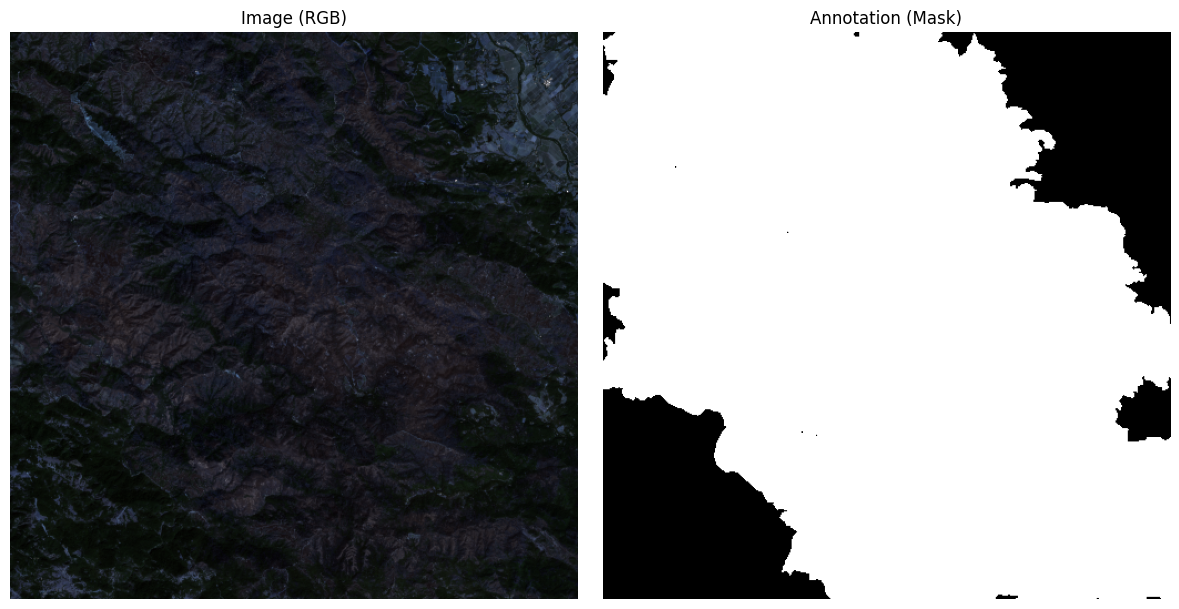

In [7]:
# Get a sample
sample = train_ds[0]

# Read the image and mask files with rasterio
with rasterio.open(sample["image"]) as src_img:
    image = src_img.read()
    profile = src_img.profile  # Keep profile for reference

with rasterio.open(sample["annotation"]) as src_mask:
    mask = src_mask.read(1)

# Prepare RGB image for visualization
image_rgb = image[:3].transpose(1, 2, 0)  # C,H,W to H,W,C

# Normalize each channel separately for display
for i in range(3):
    channel = image_rgb[:, :, i]
    min_val = np.min(channel)
    max_val = np.max(channel)
    if max_val > min_val:
        image_rgb[:, :, i] = (channel - min_val) / (max_val - min_val)

# Plot image and mask side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_rgb)
axs[0].set_title("Image (RGB)")
axs[0].axis("off")

axs[1].imshow(mask, cmap="gray", vmin=0, vmax=1)
axs[1].set_title("Annotation (Mask)")
axs[1].axis("off")

plt.tight_layout()
plt.show()

# Train a U-Net Model GeoCroissant using Hugging Face + PyTorch

In this notebook, we’ll train a U-Net model:

-  **GeoCroissant-style dataset** via Hugging Face `datasets`  
-  **Rasterio** for reading GeoTIFFs  
-  **PyTorch** for model building and training  

#  1. Load Dataset with Local Dataset Loader
- We use a custom local dataset loader `load_hls_dataset.py` that loads the burn scar dataset from local TIFF files.
- This approach works with the current version of the `datasets` library and doesn't require internet connectivity.

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import rasterio
import numpy as np
from tqdm import tqdm
from load_hls_dataset import load_hls_burn_scars_dataset

# 1. Load the dataset using local files
dataset = load_hls_burn_scars_dataset()

train_ds = dataset["train"]

Found 540 training samples
Found 264 validation samples


# 2. Build a PyTorch Dataset
- We define a `BurnScarsDataset` class to load and preprocess `.tif` satellite images and burn scar masks using `rasterio`.

In [9]:
# 2. Data pipeline
class BurnScarsDataset(Dataset):
    def __init__(self, hf_dataset):
        self.dataset = hf_dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        with rasterio.open(sample["image"]) as img_file:
            image = img_file.read([1, 2, 3])
        image = image.astype("float32") / 255.0
        image = torch.from_numpy(image).float()  # (C, H, W)
        with rasterio.open(sample["annotation"]) as mask_file:
            mask = mask_file.read(1)
        mask = torch.from_numpy(mask).long()  # (H, W)
        mask = (mask > 0).long()  # Ensure binary
        return image, mask


batch_size = 8
full_dataset = BurnScarsDataset(train_ds)
train_loader = DataLoader(
    full_dataset, batch_size=batch_size, shuffle=True, pin_memory=True
)

# 3. Define the U-Net Segmentation Model
- We use a classic U-Net architecture with encoder-decoder blocks and skip connections for semantic segmentation.

In [10]:
# 4. U-Net Model
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.conv(x)


class UNet(nn.Module):
    def __init__(self, n_channels=3, n_classes=1):
        super().__init__()
        self.inc = DoubleConv(n_channels, 64)
        self.down1 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(64, 128))
        self.down2 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(128, 256))
        self.down3 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(256, 512))
        self.down4 = nn.Sequential(nn.MaxPool2d(2), DoubleConv(512, 1024))
        self.up1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.conv1 = DoubleConv(1024, 512)
        self.up2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.conv2 = DoubleConv(512, 256)
        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv3 = DoubleConv(256, 128)
        self.up4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv4 = DoubleConv(128, 64)
        self.outc = nn.Conv2d(64, n_classes, kernel_size=1)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5)
        x = self.conv1(torch.cat([x, x4], dim=1))
        x = self.up2(x)
        x = self.conv2(torch.cat([x, x3], dim=1))
        x = self.up3(x)
        x = self.conv3(torch.cat([x, x2], dim=1))
        x = self.up4(x)
        x = self.conv4(torch.cat([x, x1], dim=1))
        logits = self.outc(x)
        return logits

In [11]:
# 5. Setup device, model, optimizer, loss
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = UNet(n_channels=3, n_classes=1).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()

Using device: cuda


# 5. Train the U-Net Model

In [12]:
# 6. Training
epochs = 5
for epoch in range(1, epochs + 1):
    model.train()
    total_loss = 0.0
    loop = tqdm(train_loader, desc=f"Epoch {epoch} [Train]", leave=False)
    for images, masks in loop:
        images = images.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True).float()
        outputs = model(images)
        outputs = outputs.squeeze(1)  # (B, H, W)
        loss = criterion(outputs, masks)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())
    print(f"Epoch {epoch} Train Loss: {total_loss/len(train_loader):.4f}")

Epoch 1 Train Loss: 0.3795


Epoch 2 Train Loss: 0.2915


Epoch 3 Train Loss: 0.2726


Epoch 4 Train Loss: 0.2747


Epoch 5 Train Loss: 0.2701


In [14]:
print(model)

UNet(
  (inc): DoubleConv(
    (conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

# 7. Testing the Model

In [13]:
# 7. Testing
model.eval()
model = model.to(device)

total_val_loss = 0.0
num_examples = 0
true_positives = 0

with torch.no_grad():
    for images, masks in tqdm(train_loader, desc=f"Epoch {epoch} [Val]", leave=False):
        images = images.to(device, non_blocking=True)
        masks = masks.to(device, non_blocking=True)

        outputs = model(images)
        outputs = outputs.squeeze(1)

        preds = (torch.sigmoid(outputs) > 0.5).long()
        total_val_loss += criterion(outputs, masks.float()).item()
        true_positives += (preds == masks).sum().item()
        num_examples += masks.numel()

val_accuracy = true_positives / num_examples * 100
print(
    f"Epoch {epoch} Val Loss: {total_val_loss/len(train_loader):.4f} | Accuracy:"
    f" {val_accuracy:.2f}%"
)

Epoch 5 Val Loss: 2.5176 | Accuracy: 88.10%
